## 1.0 Introduction
#### In this project, accident data was drawn from the city of chicago in the USA to extract insights and create a predictive model that predicts Distribution of Primary Contributory Causes. The study used the Regression model to predict the the higest primary cause of accidents in Chicago 

#### Traffic crashes are a major threat to public safety because they often cause injuries,deaths, and financial losses.
#### Knowing the main reasons for these events, when they happen most often, and the groups of people who are most affected can help one to come up with good safety measures. 
#### This project will take a  look at what causes accidents, how often they happen by month and day, and how gender affects accident rates and injuries.
#### Traffic accidents may arise from a confluence of human error, environmental variables, and vehicle-related causes. According to published data, prevalent contributory factors of accidents include:
#### Speeding: exceeding the speed limit will  shortens reaction time thus one is more prone to accidents 
#### Distraction : A driver is likely distratected by use of phone while driving ,altering in car entertainment  can also be a major cause of accident 
#### Disregards of traffic lights especially at intersections 
#### Driving under the influence of alcohol
#### Weather condition ,  rain, snow and fog usually increases the risk of collision 
#### Wreckless  driving is another cause of accidents 


## 2.0 Business Understanding
#### The main objective of this study is to understand the pattern of these accidents .i.e when  and how they occur .
## 3.0 The Data 
#### the data on kaggel  . https://www.kaggle.com/datasets/isadoraamorim/trafficcrasheschicago\ was used for  Analyis 



## Data Understanding  And Cleaning 
#### This is important  as it provides a snapshot of the type of information typically available on our datasets 
#### There were 3 sets of data  which was merged and analysis done on the merged datset 

In [1]:
#import Libraries 
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
# loadin  datasets 
df_people=pd.read_csv("Traffic_Crashes_-_People.csv")
df_people

C:\Users\Carol\AppData\Local\Temp\ipykernel_20260\500939363.py:2: DtypeWarning: Columns (11,12,19,20,21,22,23,24,25,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_people=pd.read_csv("Traffic_Crashes_-_People.csv")


,PERSON_ID,PERSON_TYPE,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O10,DRIVER,HY368708,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,M,...,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O100,DRIVER,HY374018,96.0,07/31/2015 05:50:00 PM,NaN,ELK GROVE,IL,60007,M,...,NaN,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O1000,DRIVER,HY407431,954.0,09/02/2015 11:45:00 AM,NaN,CHICAGO,IL,NaN,M,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10000,DRIVER,HY484148,9561.0,10/31/2015 09:30:00 PM,NaN,SKOKIE,IL,60076,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O100001,DRIVER,HZ525619,96762.0,11/15/2016 05:45:00 PM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564295,P126663,PASSENGER,JC113528,535688.0,01/11/2019 09:35:00 PM,3.0,CHICAGO,IL,60643,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564296,P126664,PASSENGER,JC113528,535678.0,01/11/2019 09:35:00 PM,3.0,CHICAGO,IL,60643,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564297,P126665,PASSENGER,JC113579,535694.0,01/11/2019 10:45:00 PM,3.0,CHICAGO,IL,60624,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564298,P126669,PASSENGER,JC113604,535703.0,01/11/2019 11:08:00 PM,3.0,NaN,NaN,NaN,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_crashes=pd.read_csv("Traffic_Crashes_-_Crashes.csv")
df_crashes

C:\Users\Carol\AppData\Local\Temp\ipykernel_20260\1971419737.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crashes=pd.read_csv("Traffic_Crashes_-_Crashes.csv")


,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC123097,NaN,01/19/2019 11:45:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,23,7,1,41.859566,-87.659525,POINT (-87.659524513506 41.859565972988)
1,JC123084,NaN,01/19/2019 11:30:00 PM,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",PEDALCYCLIST,NOT DIVIDED,...,0.0,1.0,1.0,0.0,23,7,1,41.928335,-87.699915,POINT (-87.699915181766 41.928335036314)
2,JC123076,NaN,01/19/2019 11:16:00 PM,25,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,23,7,1,41.870048,-87.715673,POINT (-87.715673407351 41.870048406533)
3,JC123075,NaN,01/19/2019 11:15:00 PM,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,23,7,1,41.876569,-87.686450,POINT (-87.686449738767 41.876568874081)
4,JC123050,Y,01/19/2019 10:52:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,22,7,1,41.946837,-87.690697,POINT (-87.690696829341 41.946837390731)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261260,HY498942,Y,11/11/2014 08:00:00 PM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,20,3,11,41.998270,-87.662997,POINT (-87.662996825424 41.998269693725)
261261,HZ400518,NaN,08/20/2014 04:50:00 PM,0,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,16,4,8,41.751143,-87.607091,POINT (-87.607090627909 41.751143217534)
261262,HZ164689,NaN,02/24/2014 07:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,19,2,2,41.884016,-87.701143,POINT (-87.701142757538 41.884016475152)
261263,HZ122950,NaN,01/21/2014 07:40:00 AM,30,YIELD,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),...,1.0,0.0,1.0,0.0,7,3,1,41.760710,-87.561946,POINT (-87.561946030143 41.760710194223)


In [4]:
df_vehicles=pd.read_csv("Traffic_Crashes_-_Vehicles.csv")
df_vehicles

C:\Users\Carol\AppData\Local\Temp\ipykernel_20260\2111400372.py:1: DtypeWarning: Columns (18,39,40,41,43,47,48,49,54,57,58,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicles=pd.read_csv("Traffic_Crashes_-_Vehicles.csv")


,CRASH_UNIT_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,394092,JB278428,05/24/2018 04:45:00 PM,2,DRIVER,NaN,379191.0,NaN,DODGE,CHARGER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,394093,JB278428,05/24/2018 04:45:00 PM,1,PARKED,NaN,379180.0,NaN,PONTIAC,G6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,396094,JB281663,05/28/2018 12:30:00 AM,1,DRIVER,NaN,380981.0,NaN,VOLKSWAGEN,JETTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,396095,JB281663,05/28/2018 12:30:00 AM,2,DRIVER,1.0,380986.0,NaN,NISSAN,NISSAN MAXIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,396943,JB283806,05/29/2018 11:30:00 AM,1,DRIVER,NaN,381829.0,NaN,UNKNOWN,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527447,567026,JC123075,01/19/2019 11:15:00 PM,2,DRIVER,NaN,540775.0,NaN,INFINITI,M35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527448,567030,JC123021,01/19/2019 09:40:00 PM,1,DRIVER,NaN,540768.0,NaN,"TOYOTA MOTOR COMPANY, LTD.",CAMRY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527449,567031,JC123097,01/19/2019 11:45:00 PM,1,DRIVER,NaN,540770.0,NaN,JEEP,PATRIOT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527450,567032,JC123097,01/19/2019 11:45:00 PM,2,DRIVER,NaN,540772.0,NaN,CHEVROLET,MALIBU (CHEVELLE),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# information on "Traffic_Crashes_-_People.csv"
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564300 entries, 0 to 564299
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PERSON_ID              564300 non-null  object 
 1   PERSON_TYPE            564300 non-null  object 
 2   RD_NO                  564300 non-null  object 
 3   VEHICLE_ID             553927 non-null  float64
 4   CRASH_DATE             564300 non-null  object 
 5   SEAT_NO                108839 non-null  float64
 6   CITY                   420390 non-null  object 
 7   STATE                  422339 non-null  object 
 8   ZIPCODE                384916 non-null  object 
 9   SEX                    557162 non-null  object 
 10  AGE                    403343 non-null  float64
 11  DRIVERS_LICENSE_STATE  339444 non-null  object 
 12  DRIVERS_LICENSE_CLASS  303100 non-null  object 
 13  SAFETY_EQUIPMENT       562945 non-null  object 
 14  AIRBAG_DEPLOYED        554161 non-nu

In [6]:
# information on "Traffic_Crashes_-_crashes.csv"
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261265 entries, 0 to 261264
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RD_NO                          261265 non-null  object 
 1   CRASH_DATE_EST_I               19520 non-null   object 
 2   CRASH_DATE                     261265 non-null  object 
 3   POSTED_SPEED_LIMIT             261265 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         261265 non-null  object 
 5   DEVICE_CONDITION               261265 non-null  object 
 6   WEATHER_CONDITION              261265 non-null  object 
 7   LIGHTING_CONDITION             261265 non-null  object 
 8   FIRST_CRASH_TYPE               261265 non-null  object 
 9   TRAFFICWAY_TYPE                261265 non-null  object 
 10  LANE_CNT                       182307 non-null  object 
 11  ALIGNMENT                      261265 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [7]:
# information on 'Traffic_Crashes_-_Vehicles.csv'
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527452 entries, 0 to 527451
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CRASH_UNIT_ID             527452 non-null  int64  
 1   RD_NO                     527452 non-null  object 
 2   CRASH_DATE                527452 non-null  object 
 3   UNIT_NO                   527452 non-null  int64  
 4   UNIT_TYPE                 527443 non-null  object 
 5   NUM_PASSENGERS            73483 non-null   float64
 6   VEHICLE_ID                516997 non-null  float64
 7   CMRC_VEH_I                8524 non-null    object 
 8   MAKE                      516997 non-null  object 
 9   MODEL                     515399 non-null  object 
 10  LIC_PLATE_STATE           474935 non-null  object 
 11  VEHICLE_YEAR              433940 non-null  float64
 12  VEHICLE_DEFECT            516997 non-null  object 
 13  VEHICLE_TYPE              516997 non-null  o

In [8]:
# Joining the datasets  using RD_NO . RD_NO is a common column on all the datasets 
merged_df = df_crashes.merge(df_vehicles, on='RD_NO', how='left')
merged_df1 = merged_df.merge(df_people, on='RD_NO', how='left')


In [9]:
 #merged_df1.info()
 # very huge data with 127 columns and 3396941 rows 

In [10]:
#check for missing values 
missing_values=merged_df1.isnull().sum()
missing_values

RD_NO                           0
CRASH_DATE_EST_I          1107029
CRASH_DATE_x                    0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
                           ...   
PEDPEDAL_VISIBILITY       1152658
PEDPEDAL_LOCATION         1152577
BAC_RESULT                 232290
BAC_RESULT VALUE          1172421
CELL_PHONE_USE            1171598
Length: 146, dtype: int64

In [11]:
#get percentage of missing values 
missing_values_percentage = (missing_values / len(merged_df1)) * 100
missing_values_percentage.sort_values(ascending=True)
# there a number of number of columns with alot of missing data 

RD_NO                        0.000000
CRASH_HOUR                   0.000000
STREET_NO                    0.000000
SEC_CONTRIBUTORY_CAUSE       0.000000
PRIM_CONTRIBUTORY_CAUSE      0.000000
                              ...    
WIDE_LOAD_I                 99.992844
TRAILER2_LENGTH             99.994462
HAZMAT_NAME                 99.996081
MCS_REPORT_NO               99.999489
HAZMAT_REPORT_NO           100.000000
Length: 146, dtype: float64

In [12]:
# Creating  a DataFrame to display missing values
missing_df = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage': missing_values_percentage.values
})

In [13]:
# Filter only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df


,Column Name,Missing Values,Percentage
1,CRASH_DATE_EST_I,1107029,94.310829
10,LANE_CNT,339729,28.942443
14,REPORT_TYPE,26330,2.243125
16,INTERSECTION_RELATED_I,872110,74.297437
17,NOT_RIGHT_OF_WAY_I,1136578,96.828189
...,...,...,...
141,PEDPEDAL_VISIBILITY,1152658,98.198088
142,PEDPEDAL_LOCATION,1152577,98.191188
143,BAC_RESULT,232290,19.789421
144,BAC_RESULT VALUE,1172421,99.881752


In [14]:
# Display the missing values
print(missing_df.sort_values(by='Percentage', ascending=False))

            Column Name  Missing Values  Percentage
99     HAZMAT_REPORT_NO         1173809  100.000000
101       MCS_REPORT_NO         1173803   99.999489
95          HAZMAT_NAME         1173763   99.996081
109     TRAILER2_LENGTH         1173744   99.994462
105         WIDE_LOAD_I         1173725   99.992844
..                  ...             ...         ...
49         CRASH_DATE_y             397    0.033822
50              UNIT_NO             397    0.033822
26   BEAT_OF_OCCURRENCE              18    0.001533
24     STREET_DIRECTION               8    0.000682
25          STREET_NAME               4    0.000341

[125 rows x 3 columns]


In [15]:
# Drop columns with more than 80% missing values
drop_columns = missing_df[missing_df['Percentage'] > 10]['Column Name'].tolist()
df = merged_df1.drop(columns=drop_columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173809 entries, 0 to 1173808
Data columns (total 61 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   RD_NO                          1173809 non-null  object 
 1   CRASH_DATE_x                   1173809 non-null  object 
 2   POSTED_SPEED_LIMIT             1173809 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         1173809 non-null  object 
 4   DEVICE_CONDITION               1173809 non-null  object 
 5   WEATHER_CONDITION              1173809 non-null  object 
 6   LIGHTING_CONDITION             1173809 non-null  object 
 7   FIRST_CRASH_TYPE               1173809 non-null  object 
 8   TRAFFICWAY_TYPE                1173809 non-null  object 
 9   ALIGNMENT                      1173809 non-null  object 
 10  ROADWAY_SURFACE_COND           1173809 non-null  object 
 11  ROAD_DEFECT                    1173809 non-null  object 
 12  REPORT_TYPE   

In [16]:
#getting the statistics of the data( this captures only numerical columns)
df.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,...,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_UNIT_ID,UNIT_NO,VEHICLE_ID_x,OCCUPANT_CNT,VEHICLE_ID_y
count,1.173809e+06,1.173809e+06,1.173791e+06,1.173412e+06,1.172647e+06,1.172647e+06,1.172647e+06,1.172647e+06,1.172647e+06,1.172647e+06,...,1.173809e+06,1.173809e+06,1.173809e+06,1.168910e+06,1.168910e+06,1.173412e+06,1.173412e+06,1.149744e+06,1.149744e+06,1.145726e+06
mean,2.868142e+01,3.521291e+03,1.237101e+03,2.154740e+00,2.466087e-01,1.232255e-03,2.586030e-02,1.307606e-01,8.875561e-02,2.658140e+00,...,1.342792e+01,4.141997e+00,7.086310e+00,4.186060e+01,-8.767728e+01,2.808317e+05,1.577290e+00,2.703637e+05,1.384669e+00,2.692769e+05
std,6.442759e+00,2.910679e+03,7.102562e+02,5.629079e-01,7.396614e-01,4.018065e-02,2.052668e-01,5.289365e-01,4.279177e-01,2.138492e+00,...,5.300764e+00,1.971884e+00,3.458827e+00,8.382255e-02,5.745187e-02,1.623881e+05,6.392833e-01,1.546883e+05,1.472333e+00,1.540253e+05
min,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,4.164467e+01,-8.792504e+01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00
25%,3.000000e+01,1.120000e+03,7.120000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,...,1.000000e+01,2.000000e+00,4.000000e+00,4.178759e+01,-8.772018e+01,1.408398e+05,1.000000e+00,1.392038e+05,1.000000e+00,1.387040e+05
50%,3.000000e+01,3.030000e+03,1.214000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,...,1.400000e+01,4.000000e+00,7.000000e+00,4.187791e+01,-8.767112e+01,2.801100e+05,2.000000e+00,2.710705e+05,1.000000e+00,2.699860e+05
75%,3.000000e+01,5.500000e+03,1.824000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,...,1.700000e+01,6.000000e+00,1.000000e+01,4.192394e+01,-8.763222e+01,4.207570e+05,2.000000e+00,4.033752e+05,1.000000e+00,4.017648e+05
max,9.900000e+01,4.511000e+05,2.535000e+03,1.800000e+01,2.100000e+01,3.000000e+00,7.000000e+00,2.100000e+01,1.000000e+01,6.100000e+01,...,2.300000e+01,7.000000e+00,1.200000e+01,4.202278e+01,-8.752459e+01,5.670330e+05,1.800000e+01,5.407750e+05,6.000000e+01,5.357420e+05


In [17]:
#changing the mappring of the days of the week by creating a new column "CRASH_DAY_NAME"

import calendar

# Assuming CRASH_DAY_OF_WEEK is stored as numbers (1=Sunday, 2=Monday, ..., 7=Saturday)

df["CRASH_DAY_NAME"] = df["CRASH_DAY_OF_WEEK"].map(lambda x: calendar.day_name[x % 7])



# Convert month numbers (1-12) to month names
df["CRASH_MONTH_NAME"] =df["CRASH_MONTH"].map(lambda x: calendar.month_name[x])

In [18]:
# Converting month and crash day name to  string before filling the missing values 
df["CRASH_MONTH_NAME"] = df["CRASH_MONTH_NAME"].astype(str)
df["CRASH_DAY_NAME"] = df["CRASH_DAY_NAME"].astype(str)

In [19]:
# select relevant columns 
relevant_columns =["CRASH_DAY_NAME", "CRASH_MONTH_NAME", "LATITUDE", "LONGITUDE", "CRASH_TYPE","INJURIES_TOTAL", "INJURIES_FATAL", "INJURIES_INCAPACITATING", "INJURIES_NON_INCAPACITATING", "INJURIES_REPORTED_NOT_EVIDENT",
    "INJURIES_NO_INDICATION", "INJURIES_UNKNOWN","PRIM_CONTRIBUTORY_CAUSE", "WEATHER_CONDITION", "ROADWAY_SURFACE_COND", "LIGHTING_CONDITION",
    "TRAFFIC_CONTROL_DEVICE", "DEVICE_CONDITION", "FIRST_CRASH_TYPE", "TRAFFICWAY_TYPE", "POSTED_SPEED_LIMIT","STREET_NAME","MAKE","MODEL","SEX","SAFETY_EQUIPMENT","AIRBAG_DEPLOYED"]
# Keep only the relevant columns
df_filtered = df[relevant_columns]



In [20]:
# Ensure df_filtered is a copy to avoid warnings
df_filtered = df_filtered.copy()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173809 entries, 0 to 1173808
Data columns (total 27 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_DAY_NAME                 1173809 non-null  object 
 1   CRASH_MONTH_NAME               1173809 non-null  object 
 2   LATITUDE                       1168910 non-null  float64
 3   LONGITUDE                      1168910 non-null  float64
 4   CRASH_TYPE                     1173809 non-null  object 
 5   INJURIES_TOTAL                 1172647 non-null  float64
 6   INJURIES_FATAL                 1172647 non-null  float64
 7   INJURIES_INCAPACITATING        1172647 non-null  float64
 8   INJURIES_NON_INCAPACITATING    1172647 non-null  float64
 9   INJURIES_REPORTED_NOT_EVIDENT  1172647 non-null  float64
 10  INJURIES_NO_INDICATION         1172647 non-null  float64
 11  INJURIES_UNKNOWN               1172647 non-null  float64
 12  PRIM_CONTRIBUT

In [21]:
# # Save filtered df
df_filtered.to_csv("Filtered_Traffic_Crashes.csv", index=False)

# Exploratory Data Analysis(EDA)
#### This method involves examining data to uncover trends and patterns, identify anomalies, test hypotheses, and validate assumptions using visualizations and summary statistics.Turkey, J.W. (1977).

In [22]:
df1 = pd.read_csv("Filtered_Traffic_Crashes.csv")
df1

,CRASH_DAY_NAME,CRASH_MONTH_NAME,LATITUDE,LONGITUDE,CRASH_TYPE,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,DEVICE_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,POSTED_SPEED_LIMIT,STREET_NAME,MAKE,MODEL,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED
0,Monday,January,41.859566,-87.659525,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,...,UNKNOWN,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),30,BLUE ISLAND AVE,JEEP,PATRIOT,NaN,NaN,NaN
1,Monday,January,41.859566,-87.659525,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,...,UNKNOWN,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),30,BLUE ISLAND AVE,CHEVROLET,MALIBU (CHEVELLE),NaN,NaN,NaN
2,Monday,January,41.928335,-87.699915,INJURY AND / OR TOW DUE TO CRASH,1.0,0.0,0.0,0.0,1.0,...,NO CONTROLS,PEDALCYCLIST,NOT DIVIDED,30,LOGAN BLVD,UNKNOWN,UNKNOWN,NaN,NaN,NaN
3,Monday,January,41.928335,-87.699915,INJURY AND / OR TOW DUE TO CRASH,1.0,0.0,0.0,0.0,1.0,...,NO CONTROLS,PEDALCYCLIST,NOT DIVIDED,30,LOGAN BLVD,NaN,NaN,NaN,NaN,NaN
4,Monday,January,41.870048,-87.715673,INJURY AND / OR TOW DUE TO CRASH,0.0,0.0,0.0,0.0,0.0,...,FUNCTIONING PROPERLY,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),25,ARTHINGTON ST,DODGE,Avenger,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173804,Thursday,January,41.760710,-87.561946,INJURY AND / OR TOW DUE TO CRASH,1.0,0.0,0.0,1.0,0.0,...,NO CONTROLS,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),30,EXCHANGE AVE,NISSAN,ROGUE,F,SAFETY BELT USED,"DEPLOYED, FRONT"
1173805,Monday,January,41.885610,-87.638756,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,...,NO CONTROLS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,30,LAKE ST,MERCEDES-BENZ,UNKNOWN,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN
1173806,Monday,January,41.885610,-87.638756,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,...,NO CONTROLS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,30,LAKE ST,MERCEDES-BENZ,UNKNOWN,M,SAFETY BELT USED,DID NOT DEPLOY
1173807,Monday,January,41.885610,-87.638756,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,...,NO CONTROLS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,30,LAKE ST,DODGE,CHARGER,M,USAGE UNKNOWN,DEPLOYMENT UNKNOWN


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173809 entries, 0 to 1173808
Data columns (total 27 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH_DAY_NAME                 1173809 non-null  object 
 1   CRASH_MONTH_NAME               1173809 non-null  object 
 2   LATITUDE                       1168910 non-null  float64
 3   LONGITUDE                      1168910 non-null  float64
 4   CRASH_TYPE                     1173809 non-null  object 
 5   INJURIES_TOTAL                 1172647 non-null  float64
 6   INJURIES_FATAL                 1172647 non-null  float64
 7   INJURIES_INCAPACITATING        1172647 non-null  float64
 8   INJURIES_NON_INCAPACITATING    1172647 non-null  float64
 9   INJURIES_REPORTED_NOT_EVIDENT  1172647 non-null  float64
 10  INJURIES_NO_INDICATION         1172647 non-null  float64
 11  INJURIES_UNKNOWN               1172647 non-null  float64
 12  PRIM_CONTRIBUT

In [24]:
df1.isnull().sum()

CRASH_DAY_NAME                       0
CRASH_MONTH_NAME                     0
LATITUDE                          4899
LONGITUDE                         4899
CRASH_TYPE                           0
INJURIES_TOTAL                    1162
INJURIES_FATAL                    1162
INJURIES_INCAPACITATING           1162
INJURIES_NON_INCAPACITATING       1162
INJURIES_REPORTED_NOT_EVIDENT     1162
INJURIES_NO_INDICATION            1162
INJURIES_UNKNOWN                  1162
PRIM_CONTRIBUTORY_CAUSE              0
WEATHER_CONDITION                    0
ROADWAY_SURFACE_COND                 0
LIGHTING_CONDITION                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
POSTED_SPEED_LIMIT                   0
STREET_NAME                          4
MAKE                             24065
MODEL                            27757
SEX                              20847
SAFETY_EQUIPMENT         

C:\Users\Carol\AppData\Local\Temp\ipykernel_20260\685834122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CRASH_MONTH_NAME', data= df1,palette='viridis')


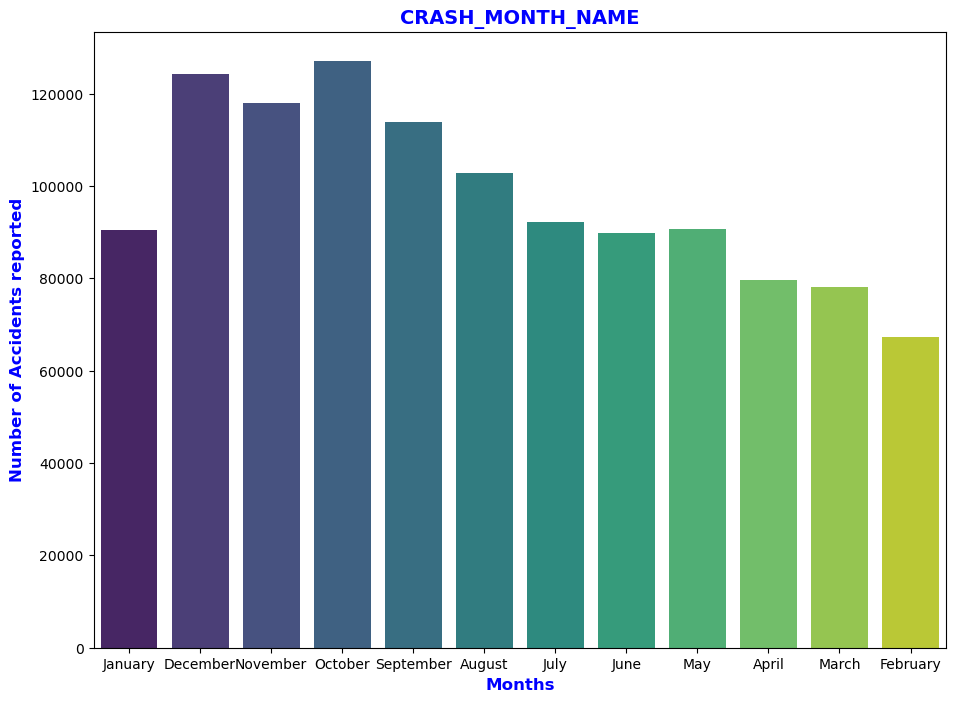

In [25]:
# Analysis of single variable distributions
# Creating the count plot for the 'warehouse_block' column


plt.figure(figsize=(11, 8)) 
sns.countplot(x='CRASH_MONTH_NAME', data= df1,palette='viridis')

# Adding title and labels 
plt.title('CRASH_MONTH_NAME',size=14, color='blue', weight='bold')
plt.xlabel('Months', size=12, color='blue', weight='bold')
plt.ylabel('Number of Accidents reported',size=12, color='blue', weight='bold')

# Display the plot
plt.show()

## The Month of October registered the highest number of accidents , while feb had the least number of accidents 

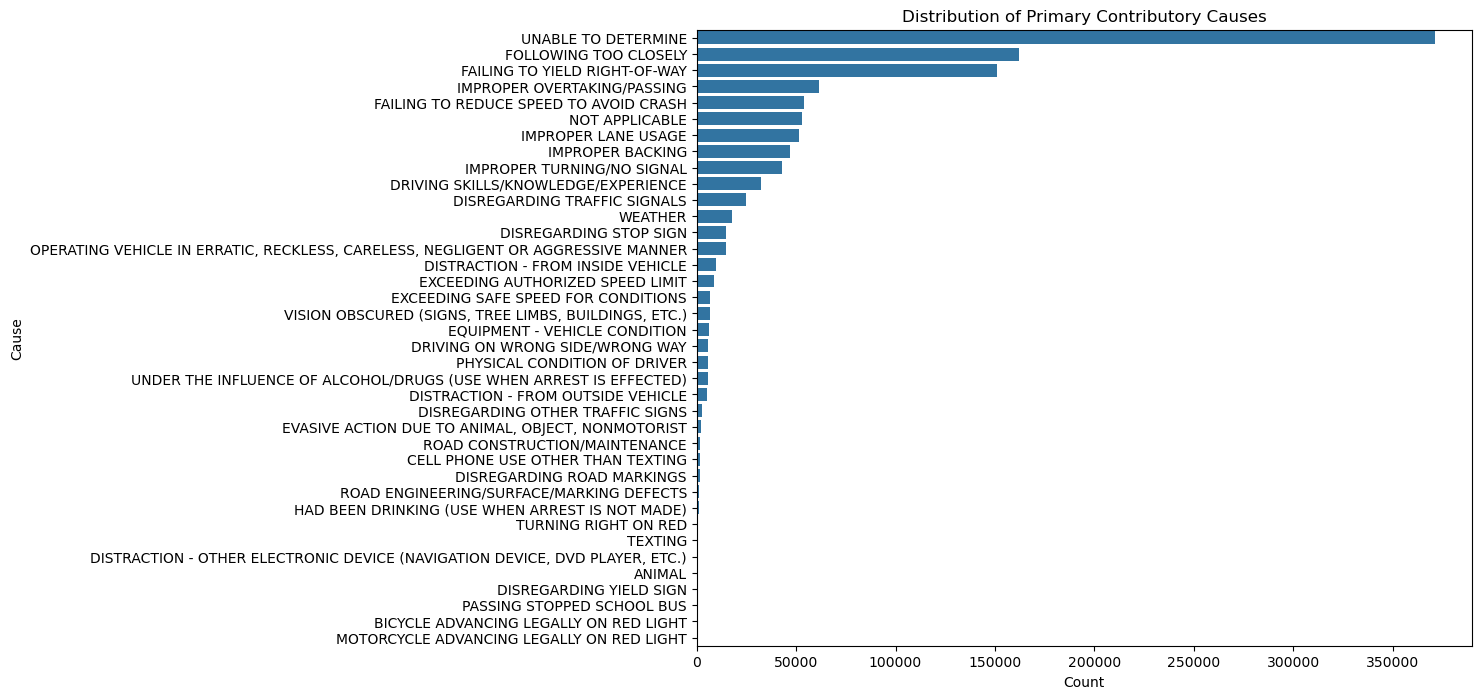

In [26]:
# Distribution of primary contributory causes
plt.figure(figsize=(10, 8))
sns.countplot(y=df['PRIM_CONTRIBUTORY_CAUSE'], order=df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title("Distribution of Primary Contributory Causes")
plt.xlabel("Count")
plt.ylabel("Cause")
plt.show()

 ### The leading cause of accidents according to Chicago  data was "unable to determine "

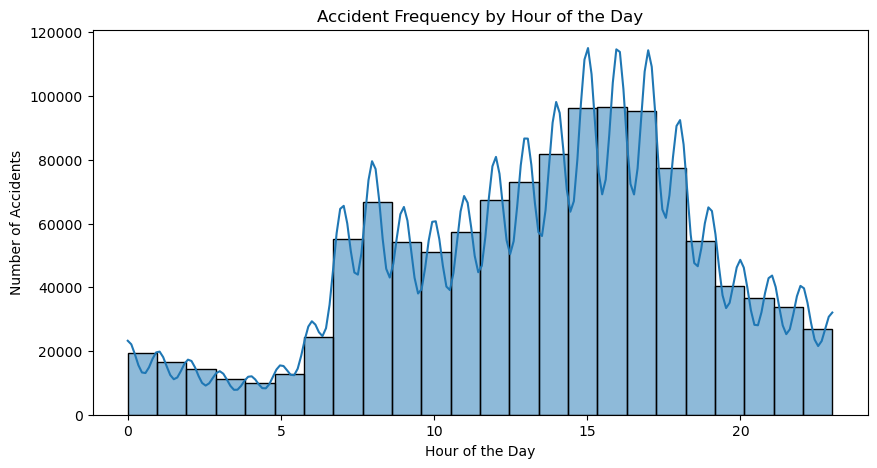

In [27]:
# Time of day vs. accident frequency
plt.figure(figsize=(10, 5))
sns.histplot(df['CRASH_HOUR'], bins=24, kde=True)
plt.title("Accident Frequency by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.show()

#### On Examining the time of accidents, most accident were recorded early inthe morning 7am & 8am , from 11am to 3pm, there was a gradual increase in number of accidents  recorded ,3pm to 5pm registered the higest number of accidents then a decline in number of accidents  noted thereafter 

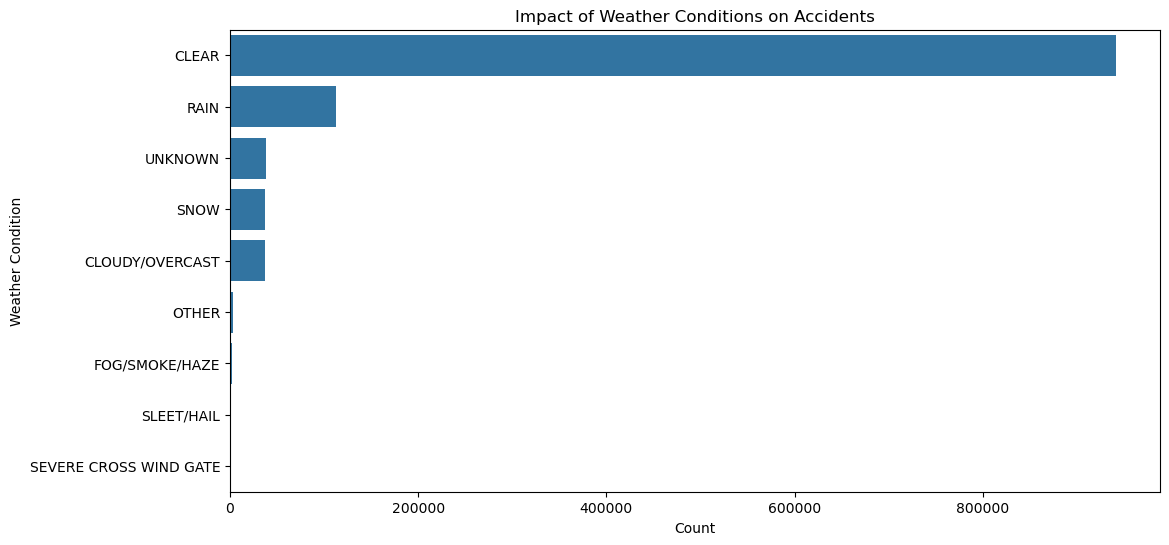

In [28]:
# Impact of weather conditions on accidents
plt.figure(figsize=(12, 6))
sns.countplot(y=df['WEATHER_CONDITION'], order=df['WEATHER_CONDITION'].value_counts().index)
plt.title("Impact of Weather Conditions on Accidents")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()

####  most accients occured during clear weather 

C:\Users\Carol\AppData\Local\Temp\ipykernel_20260\2524845605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="CRASH_DAY_NAME", order=df1["CRASH_DAY_NAME"].value_counts().index, palette="coolwarm")


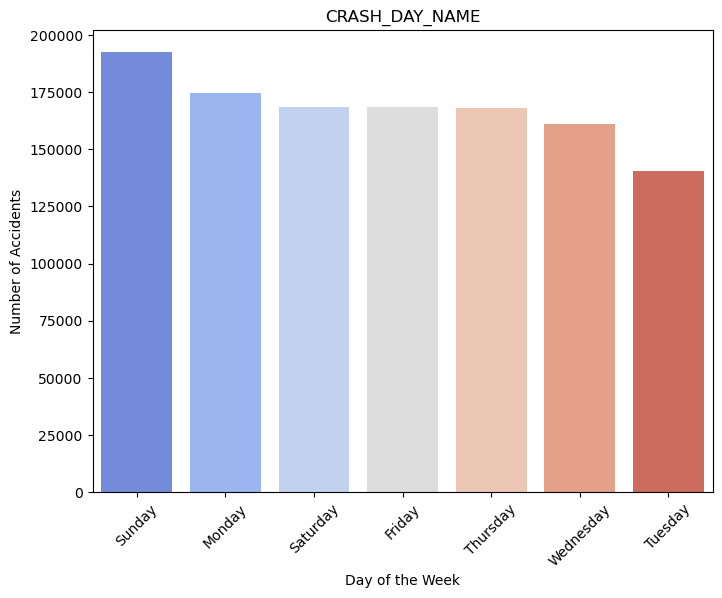

In [29]:
# Plot accidents by CRASH_DAY_NAME
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x="CRASH_DAY_NAME", order=df1["CRASH_DAY_NAME"].value_counts().index, palette="coolwarm")
plt.title("CRASH_DAY_NAME")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

#### Checking on crash day name , it was noted that most accidents occured on  Sundays  and  tuesday registered the least accidents 

C:\Users\Carol\AppData\Local\Temp\ipykernel_20260\3706411690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x="SEX", order=df1["SEX"].value_counts().index, palette="coolwarm")


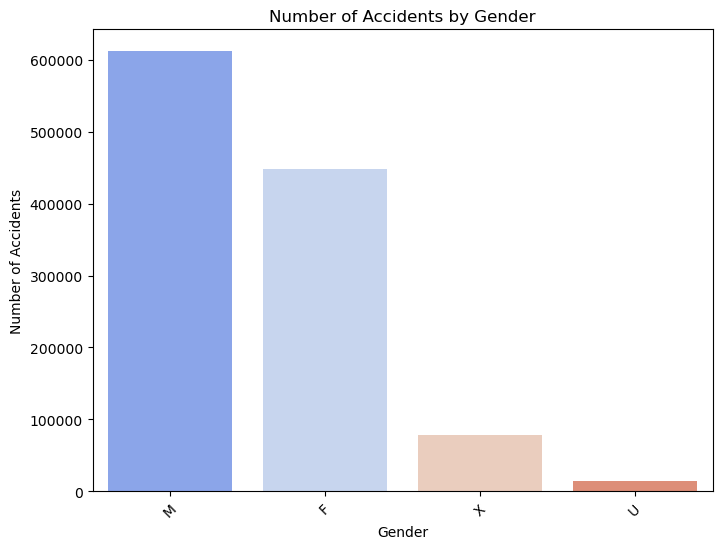

In [30]:
# Plot accidents by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x="SEX", order=df1["SEX"].value_counts().index, palette="coolwarm")
plt.title("Number of Accidents by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

#### Male gender were involved more in accidernts  that other genders 

In [31]:
#  save df1 as a new csv file 
df1= pd.read_csv("Filtered_Traffic_Crashes.csv")

df1.head()

,CRASH_DAY_NAME,CRASH_MONTH_NAME,LATITUDE,LONGITUDE,CRASH_TYPE,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,...,DEVICE_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,POSTED_SPEED_LIMIT,STREET_NAME,MAKE,MODEL,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED
0,Monday,January,41.859566,-87.659525,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,...,UNKNOWN,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),30,BLUE ISLAND AVE,JEEP,PATRIOT,NaN,NaN,NaN
1,Monday,January,41.859566,-87.659525,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,...,UNKNOWN,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),30,BLUE ISLAND AVE,CHEVROLET,MALIBU (CHEVELLE),NaN,NaN,NaN
2,Monday,January,41.928335,-87.699915,INJURY AND / OR TOW DUE TO CRASH,1.0,0.0,0.0,0.0,1.0,...,NO CONTROLS,PEDALCYCLIST,NOT DIVIDED,30,LOGAN BLVD,UNKNOWN,UNKNOWN,NaN,NaN,NaN
3,Monday,January,41.928335,-87.699915,INJURY AND / OR TOW DUE TO CRASH,1.0,0.0,0.0,0.0,1.0,...,NO CONTROLS,PEDALCYCLIST,NOT DIVIDED,30,LOGAN BLVD,NaN,NaN,NaN,NaN,NaN
4,Monday,January,41.870048,-87.715673,INJURY AND / OR TOW DUE TO CRASH,0.0,0.0,0.0,0.0,0.0,...,FUNCTIONING PROPERLY,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),25,ARTHINGTON ST,DODGE,Avenger,NaN,NaN,NaN


In [32]:
#crash day name and month were dropped as they will not be used in our model
df2 = df1.drop(columns=["CRASH_DAY_NAME", "CRASH_MONTH_NAME"])

 ## Data completeness
#### Checking for missing values and treating them. Missing values are either dropped/deleted if by so doing do not significantly impact on the clean dataset, or values imputed

In [33]:
#data cleaning
### Step 1: Identify Column Types ###
numerical_cols = df2.select_dtypes(include=["number"]).columns
categorical_cols = df2.select_dtypes(include=["object"]).columns

### Step 2: Impute Missing Values ###
# Numerical: Fill with Median
num_imputer = SimpleImputer(strategy="median")
df2[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Categorical: Fill with Most Frequent Value (Mode)
cat_imputer = SimpleImputer(strategy="most_frequent")
df2[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])




In [34]:
# Check for mising value.
# there is no missing  value 
missing_values= df2.isnull().sum()
missing_values

LATITUDE                         0
LONGITUDE                        0
CRASH_TYPE                       0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
PRIM_CONTRIBUTORY_CAUSE          0
WEATHER_CONDITION                0
ROADWAY_SURFACE_COND             0
LIGHTING_CONDITION               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
POSTED_SPEED_LIMIT               0
STREET_NAME                      0
MAKE                             0
MODEL                            0
SEX                              0
SAFETY_EQUIPMENT                 0
AIRBAG_DEPLOYED                  0
dtype: int64

### *Observation*
There are no missing values

In [35]:
# Save updated dataset . cleaned data 
df2.to_csv("cleaned_crash_data.csv", index=False)

# Modeling 

In [36]:
# loading the cleaned data 
df3= pd.read_csv("cleaned_crash_data.csv")
df3.head()

,LATITUDE,LONGITUDE,CRASH_TYPE,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,...,DEVICE_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,POSTED_SPEED_LIMIT,STREET_NAME,MAKE,MODEL,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED
0,41.859566,-87.659525,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,UNKNOWN,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),30.0,BLUE ISLAND AVE,JEEP,PATRIOT,M,SAFETY BELT USED,DID NOT DEPLOY
1,41.859566,-87.659525,NO INJURY / DRIVE AWAY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,UNKNOWN,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),30.0,BLUE ISLAND AVE,CHEVROLET,MALIBU (CHEVELLE),M,SAFETY BELT USED,DID NOT DEPLOY
2,41.928335,-87.699915,INJURY AND / OR TOW DUE TO CRASH,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NO CONTROLS,PEDALCYCLIST,NOT DIVIDED,30.0,LOGAN BLVD,UNKNOWN,UNKNOWN,M,SAFETY BELT USED,DID NOT DEPLOY
3,41.928335,-87.699915,INJURY AND / OR TOW DUE TO CRASH,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NO CONTROLS,PEDALCYCLIST,NOT DIVIDED,30.0,LOGAN BLVD,CHEVROLET,UNKNOWN,M,SAFETY BELT USED,DID NOT DEPLOY
4,41.870048,-87.715673,INJURY AND / OR TOW DUE TO CRASH,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,FUNCTIONING PROPERLY,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),25.0,ARTHINGTON ST,DODGE,Avenger,M,SAFETY BELT USED,DID NOT DEPLOY


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173809 entries, 0 to 1173808
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   LATITUDE                       1173809 non-null  float64
 1   LONGITUDE                      1173809 non-null  float64
 2   CRASH_TYPE                     1173809 non-null  object 
 3   INJURIES_TOTAL                 1173809 non-null  float64
 4   INJURIES_FATAL                 1173809 non-null  float64
 5   INJURIES_INCAPACITATING        1173809 non-null  float64
 6   INJURIES_NON_INCAPACITATING    1173809 non-null  float64
 7   INJURIES_REPORTED_NOT_EVIDENT  1173809 non-null  float64
 8   INJURIES_NO_INDICATION         1173809 non-null  float64
 9   INJURIES_UNKNOWN               1173809 non-null  float64
 10  PRIM_CONTRIBUTORY_CAUSE        1173809 non-null  object 
 11  WEATHER_CONDITION              1173809 non-null  object 
 12  ROADWAY_SURFAC

In [38]:
# Define features and target variable
X = df3.drop(columns=["PRIM_CONTRIBUTORY_CAUSE"])
y = df3[["PRIM_CONTRIBUTORY_CAUSE"]]


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    df3[col] = label_encoder.fit_transform(df3[col])  # Converts categories into numeric labels

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
print(type(X_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [45]:
# define preprocessing steps
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

preprocessor = ColumnTransformer([
     ("num", StandardScaler(), numerical_cols),
    ])
   


### Regression Model

In [46]:
# Train and evaluate each model
from sklearn.metrics import accuracy_score

pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model",LogisticRegression())  
    ])

# Fit the model and Make prediction
pipe.fit(X_train, y_train.values.ravel()) 

y_pred=pipe.predict(X_test)

 # Evaluate performance
accuracy = accuracy_score(y_test, y_pred)


print(classification_report(y_pred=y_pred,y_true=y_test))

C:\Users\Carol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Carol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                  precision    recall  f1-score   support

                                                                          ANIMAL       0.00      0.00      0.00       151
                                          BICYCLE ADVANCING LEGALLY ON RED LIGHT       0.00      0.00      0.00        67
                                               CELL PHONE USE OTHER THAN TEXTING       0.00      0.00      0.00       540
                                                DISREGARDING OTHER TRAFFIC SIGNS       0.00      0.00      0.00       753
                                                      DISREGARDING ROAD MARKINGS       0.00      0.00      0.00       490
                                                          DISREGARDING STOP SIGN       0.00      0.00      0.00      4309
                                                    DISREGARDING TRAFFIC SIGNALS       0.15      0.02      0.04      7589
                       

C:\Users\Carol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
pipe1 = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=42)) 
    ])

# Fit the model and Make prediction
pipe1.fit(X_train, y_train.values.ravel()) 

y_pred=pipe1.predict(X_test)

 # Evaluate performance
accuracy = accuracy_score(y_test, y_pred)

print (accuracy)
print(classification_report(y_pred=y_pred,y_true=y_test))

0.8092167102569127
                                                                                  precision    recall  f1-score   support

                                                                          ANIMAL       0.84      0.66      0.74       151
                                          BICYCLE ADVANCING LEGALLY ON RED LIGHT       0.86      0.63      0.72        67
                                               CELL PHONE USE OTHER THAN TEXTING       0.87      0.81      0.84       540
                                                DISREGARDING OTHER TRAFFIC SIGNS       0.87      0.67      0.75       753
                                                      DISREGARDING ROAD MARKINGS       0.76      0.68      0.72       490
                                                          DISREGARDING STOP SIGN       0.88      0.87      0.88      4309
                                                    DISREGARDING TRAFFIC SIGNALS       0.84      0.77      0.80      7589
    

### RandomForestClassifier is the better model as it has a higher accuracy score of 81%, other measurres like precision, recall and f1 scores are also higher on than those on liner regression model 

## Recommendations 
## The Month of October registered the highest number of accidents , while feb had the least number of accidents

 ### The leading cause of accidents according to Chicago  data was "unable to determine "
#### On Examining the time of accidents, most accident were recorded early inthe morning 7am & 8am , from 11am to 3pm, there was a gradual increase in number of accidents  recorded ,3pm to 5pm registered the higest number of accidents then a decline in number of accidents  noted thereafter .
####  most accients occured during clear weather 
#### Checking on crash day name , it was noted that most accidents occured on  Sundays  and  tuesday registered the least accidents
#### Male gender were involved more in accidernts  that other genders
### RandomForestClassifier is the better model as it has a higher accuracy score of 81%, other measurres like precision, recall and f1 scores are also higher on than those on liner regression model 